In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [13]:
salary_data = pd.read_json('https://data.cityofnewyork.us/resource/k397-673e.json?$limit=6000000')

In [37]:
%%time
salary_data.to_parquet('/mnt/i/data/2023-nyc-salaries.pq')

In [45]:
!ls -lh /mnt/i/data

total 204M
-rwxrwxrwx 1 nkrishna nkrishna 204M Mar 23 14:42 2023-nyc-salaries.pq


In [57]:
salary_data = pd.read_parquet('/mnt/i/data/2023-nyc-salaries.pq')

In [58]:
salary_data1 = salary_data[salary_data.fiscal_year == 2023]
salary_data1.describe()

fiscal_year  payroll_number    base_salary  regular_hours  \
count     552938.0   552938.000000  552938.000000  552938.000000   
mean        2023.0      573.035691   51337.371450     650.797779   
std            0.0      307.570095   48070.639384     883.960010   
min         2023.0        2.000000       1.000000   -1529.270000   
25%         2023.0      300.000000      33.180000       0.000000   
50%         2023.0      742.000000   48755.000000       0.000000   
75%         2023.0      747.000000   92073.000000    1820.000000   
max         2023.0      996.000000  363346.000000    6666.000000   

       regular_gross_paid       ot_hours  total_ot_paid  total_other_pay  
count       552938.000000  552938.000000  552938.000000    552938.000000  
mean         47342.361612      72.551699    4575.784169      4352.708365  
std          44230.169847     187.328651   12978.876359      7801.349333  
min         -82023.270000     -96.750000   -7096.640000   -205944.480000  
25%           4913.157500       0.000000       0.000000         0.000000  
50%          39244.800000       0.000000       0.000000       662.790000  
75%          84744.340000       1.000000      83.882500      5646.572500  
max         409058.380000    3172.500000  245420.330000    479358.000000

In [103]:
salary_data1 = salary_data1.dropna(subset=['regular_gross_paid'])
salary_data1.regular_gross_paid = salary_data1.regular_gross_paid.astype(int)

In [104]:
salary_data1.describe()

fiscal_year  payroll_number    base_salary  regular_hours  \
count     552938.0   552938.000000  552938.000000  552938.000000   
mean        2023.0      573.035691   51337.371450     650.797779   
std            0.0      307.570095   48070.639384     883.960010   
min         2023.0        2.000000       1.000000   -1529.270000   
25%         2023.0      300.000000      33.180000       0.000000   
50%         2023.0      742.000000   48755.000000       0.000000   
75%         2023.0      747.000000   92073.000000    1820.000000   
max         2023.0      996.000000  363346.000000    6666.000000   

       regular_gross_paid       ot_hours  total_ot_paid  total_other_pay  
count       552938.000000  552938.000000  552938.000000    552938.000000  
mean         47341.943592      72.551699    4575.784169      4352.708365  
std          44230.161571     187.328651   12978.876359      7801.349333  
min         -82023.000000     -96.750000   -7096.640000   -205944.480000  
25%           4913.000000       0.000000       0.000000         0.000000  
50%          39244.000000       0.000000       0.000000       662.790000  
75%          84744.000000       1.000000      83.882500      5646.572500  
max         409058.000000    3172.500000  245420.330000    479358.000000

In [105]:
salary_data1.columns

Index(['fiscal_year', 'payroll_number', 'agency_name', 'last_name',
       'first_name', 'mid_init', 'agency_start_date', 'work_location_borough',
       'title_description', 'leave_status_as_of_june_30', 'base_salary',
       'pay_basis', 'regular_hours', 'regular_gross_paid', 'ot_hours',
       'total_ot_paid', 'total_other_pay'],
      dtype='object')

In [117]:
title_salary = salary_data1.sort_values('regular_gross_paid')

In [135]:
def make_wordclouds(title_salary, num_bins = 10, start_quantile = 0):
    bin_size = int(len(title_salary) / num_bins)
    boundaries = [None] + list(range(1 * bin_size, num_bins * bin_size, bin_size)) + [None]
    quantiles = []
    for lo, hi in zip(boundaries[:-1], boundaries[1:]):
        quantiles.append(title_salary[lo:hi])


    for idx, quantile in enumerate(quantiles[start_quantile:]):
        wc = WordCloud(width=800, height=400, collocations=False)
        wc.generate_from_text(' '.join(title for title in quantile.title_description if title))
        print(f'Quantile {start_quantile + idx+1}: {quantile.regular_gross_paid.iloc[0]} - '
              f'{quantile.regular_gross_paid.iloc[-1]}, '
              f'{len(quantile)} salaries')
        display(wc.to_image())


# Deciles

Quantile 1: -82023 - 547, 55293 salaries


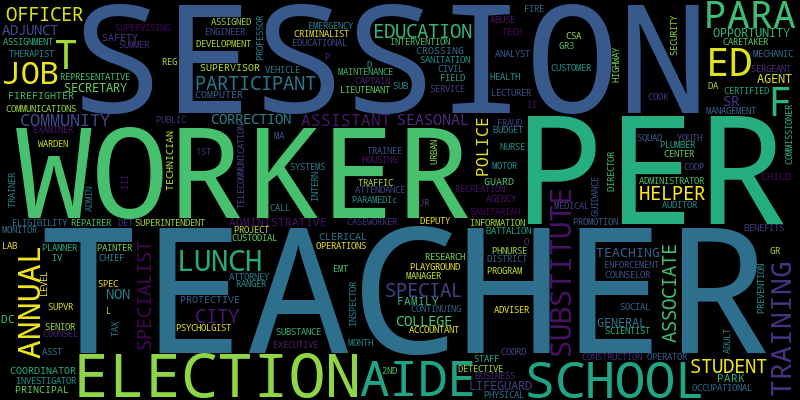

Quantile 2: 547 - 2528, 55293 salaries


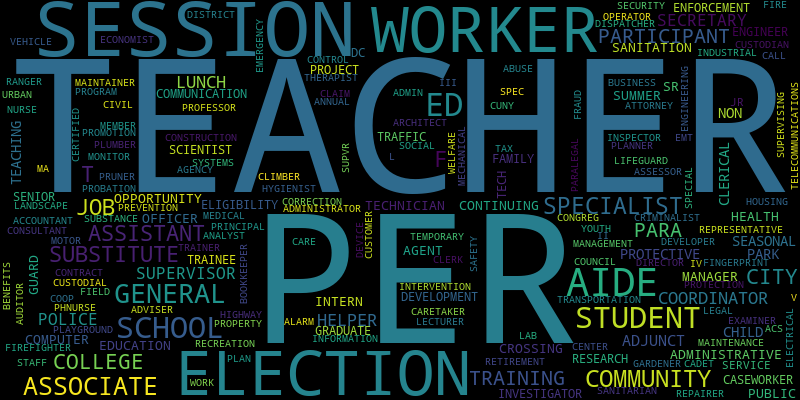

Quantile 3: 2528 - 8267, 55293 salaries


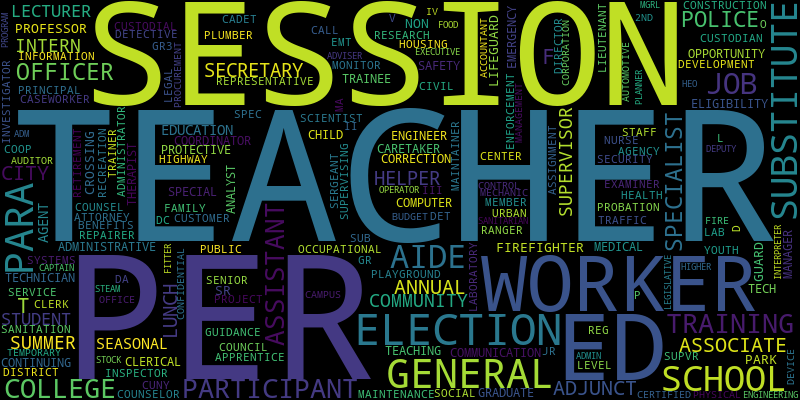

Quantile 4: 8267 - 20432, 55293 salaries


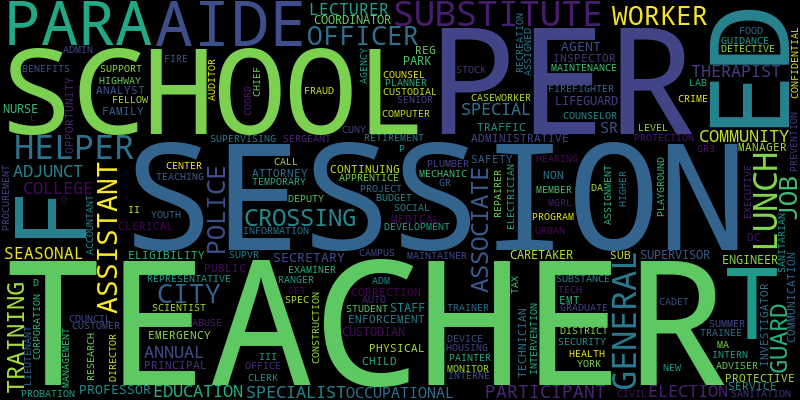

Quantile 5: 20432 - 39242, 55293 salaries


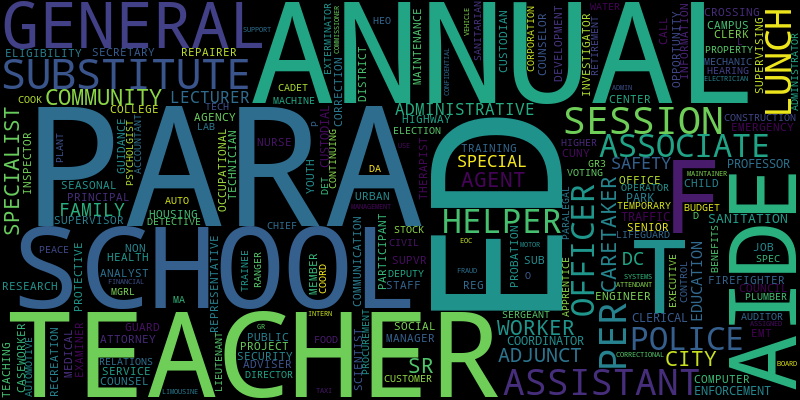

Quantile 6: 39243 - 52545, 55293 salaries


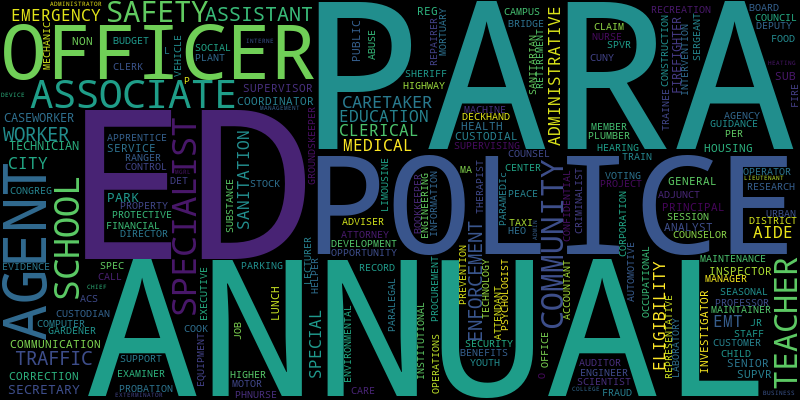

Quantile 7: 52545 - 74253, 55293 salaries


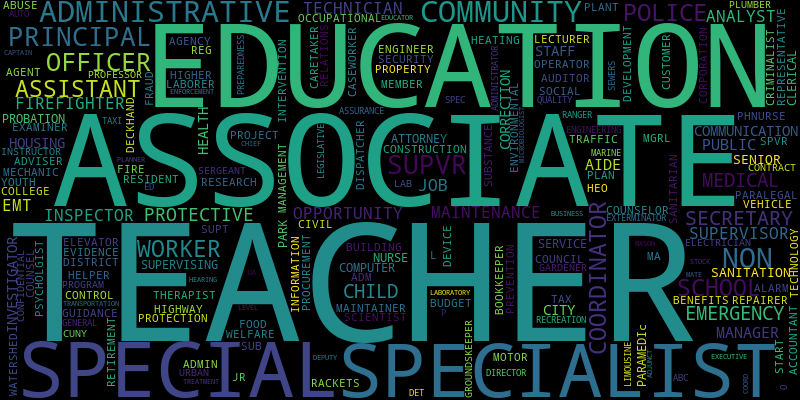

Quantile 8: 74253 - 91444, 55293 salaries


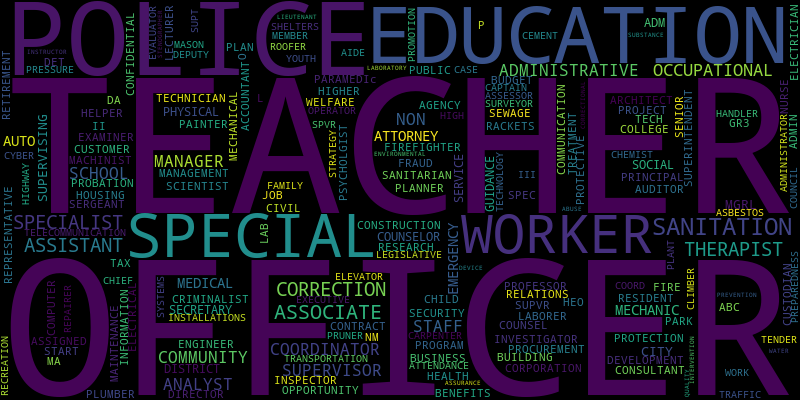

Quantile 9: 91444 - 109852, 55293 salaries


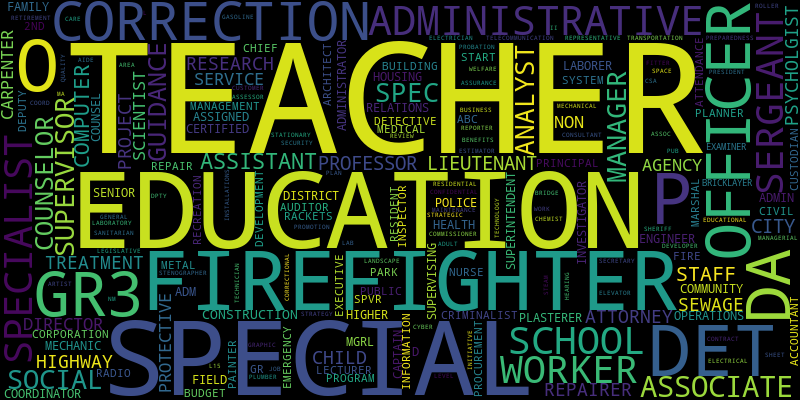

Quantile 10: 109852 - 409058, 55301 salaries


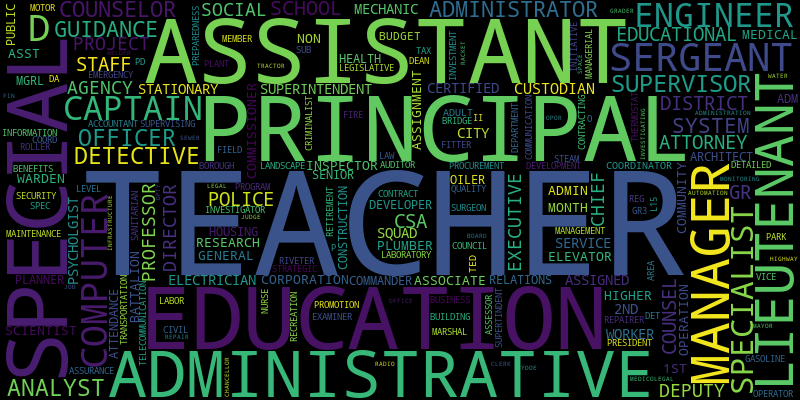

In [137]:
make_wordclouds(title_salary)

# Top Decile

Quantile 91: 109852 - 111349, 5529 salaries


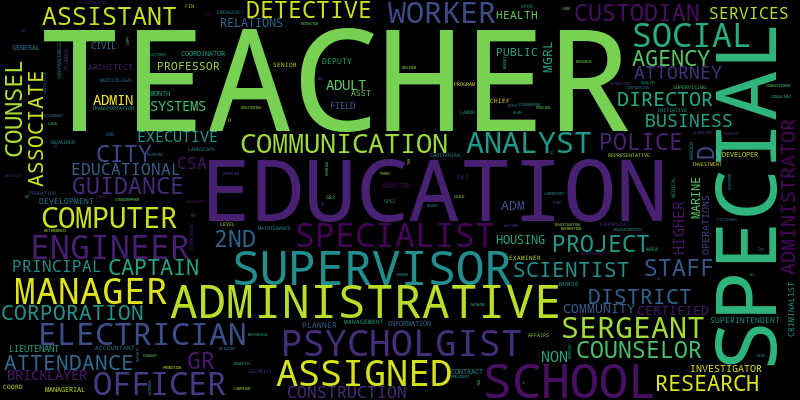

Quantile 92: 111349 - 115764, 5529 salaries


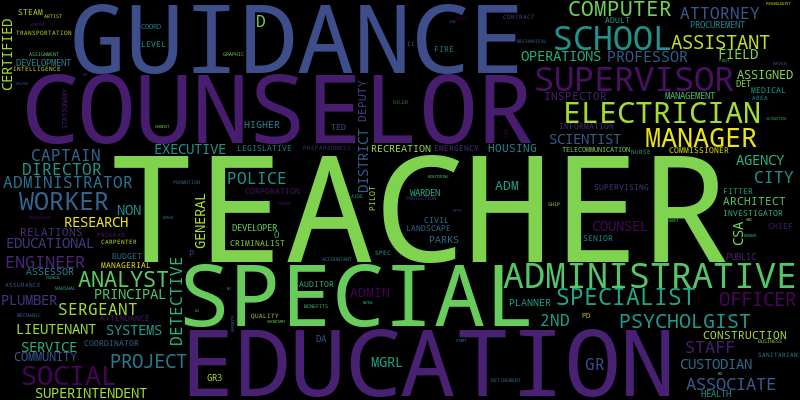

Quantile 93: 115764 - 118509, 5529 salaries


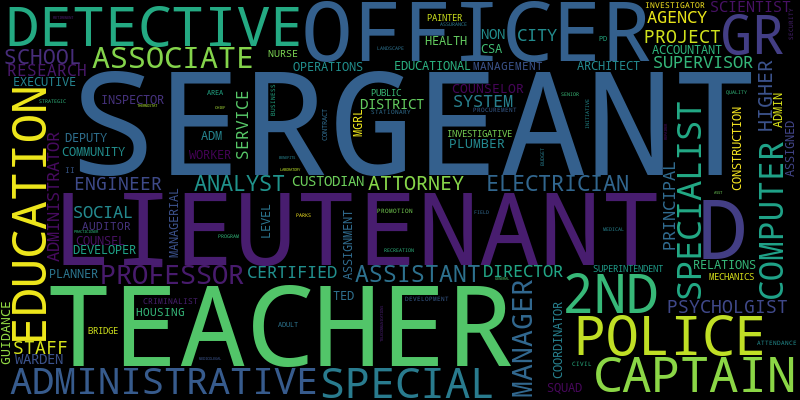

Quantile 94: 118509 - 121611, 5529 salaries


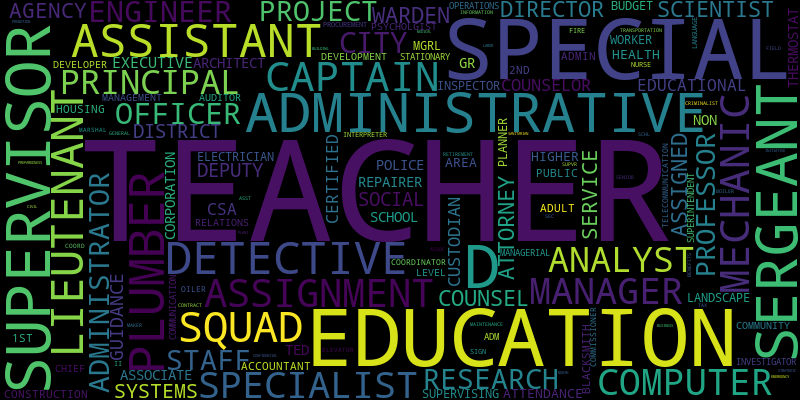

Quantile 95: 121611 - 125756, 5529 salaries


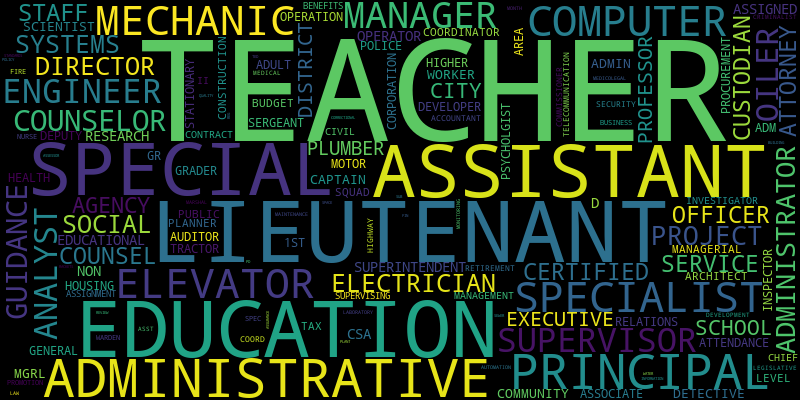

Quantile 96: 125759 - 128657, 5529 salaries


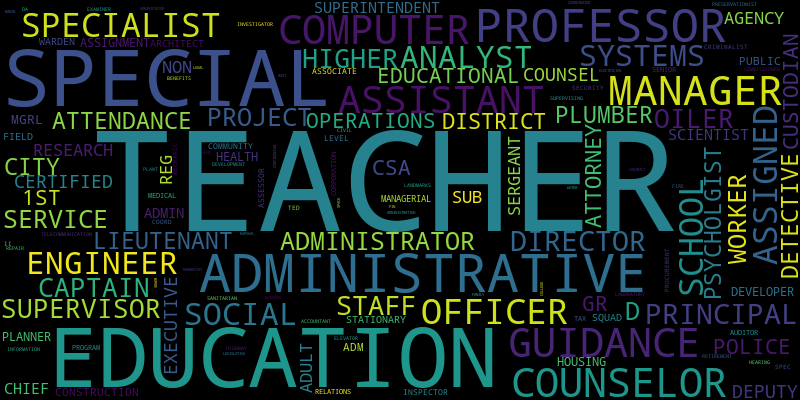

Quantile 97: 128657 - 132288, 5529 salaries


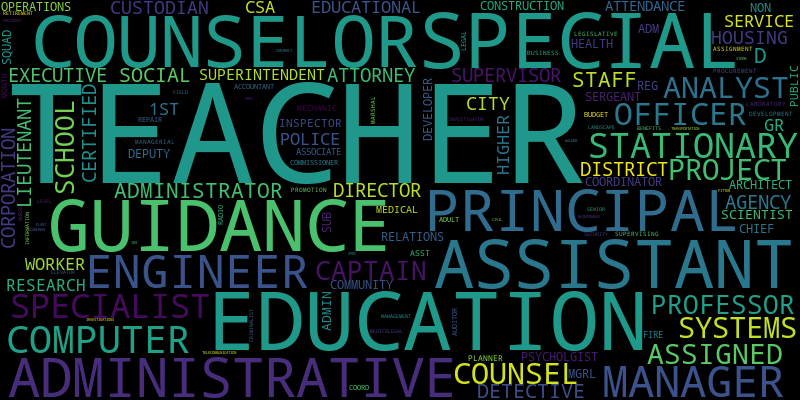

Quantile 98: 132288 - 140532, 5529 salaries


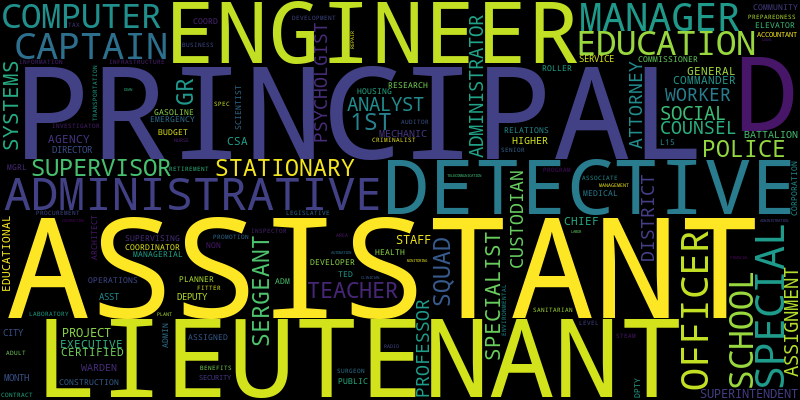

Quantile 99: 140532 - 160962, 5529 salaries


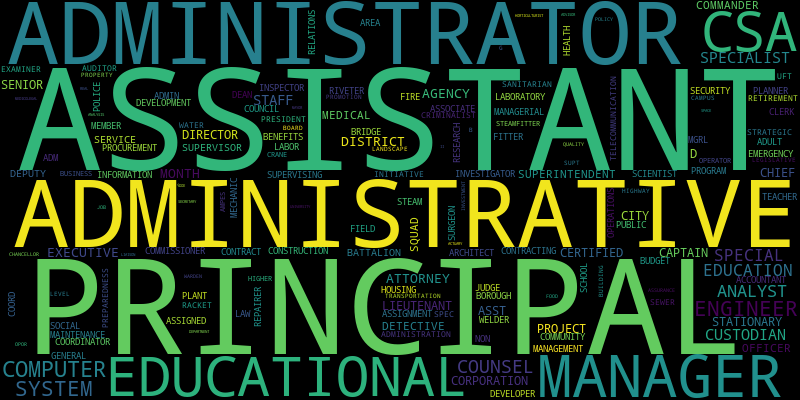

Quantile 100: 160962 - 409058, 5567 salaries


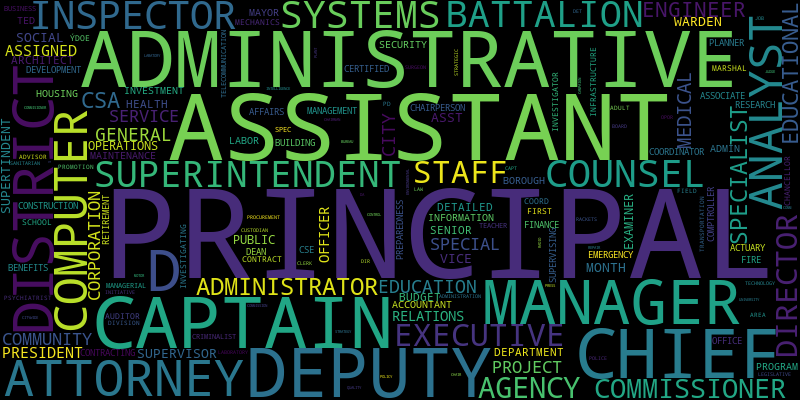

In [138]:
make_wordclouds(title_salary, 100, 90)

# The 1%

Quantile 991: 155512 - 158839, 552 salaries


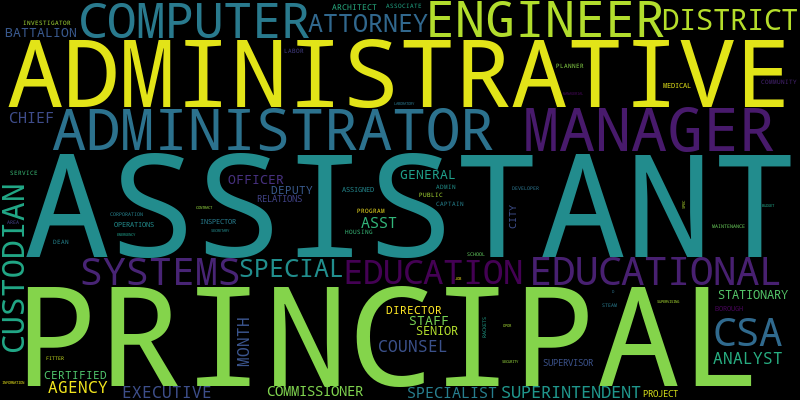

Quantile 992: 158852 - 162839, 552 salaries


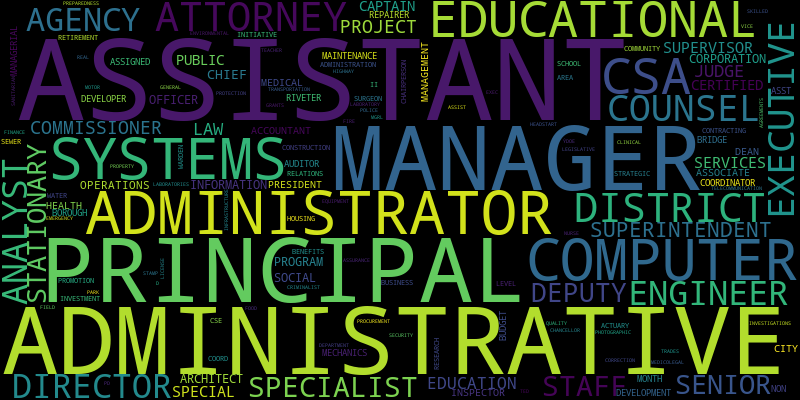

Quantile 993: 162849 - 166786, 552 salaries


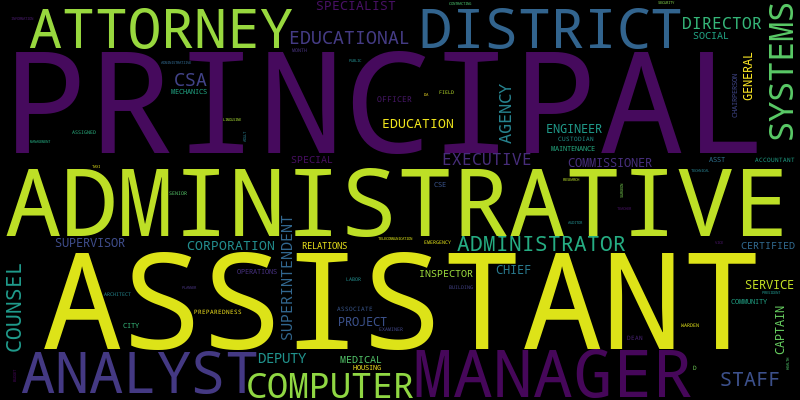

Quantile 994: 166803 - 169834, 552 salaries


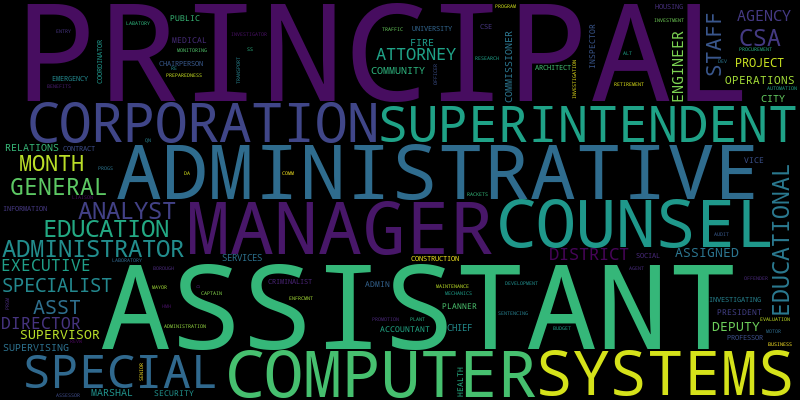

Quantile 995: 169834 - 174520, 552 salaries


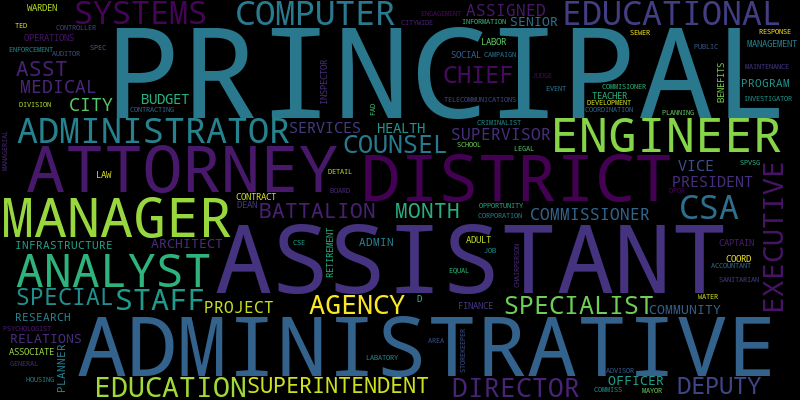

Quantile 996: 174520 - 176218, 552 salaries


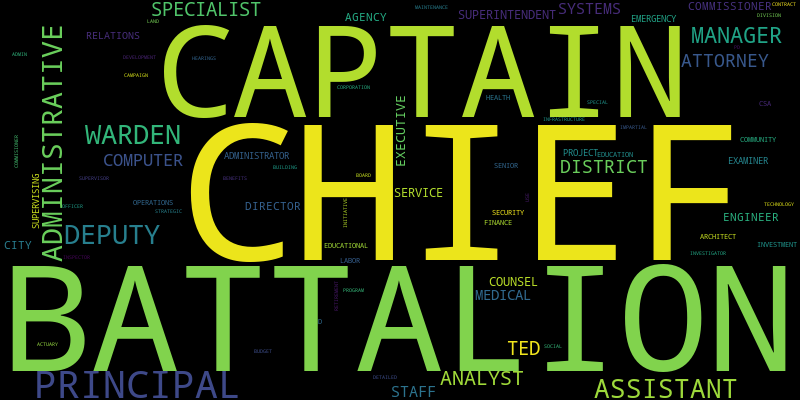

Quantile 997: 176218 - 181650, 552 salaries


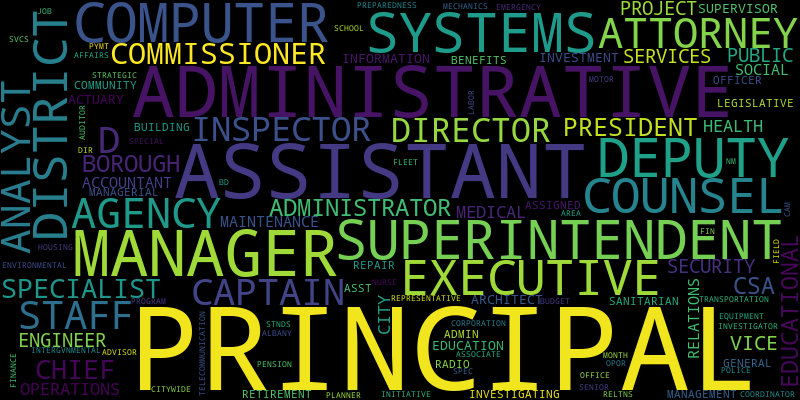

Quantile 998: 181660 - 185886, 552 salaries


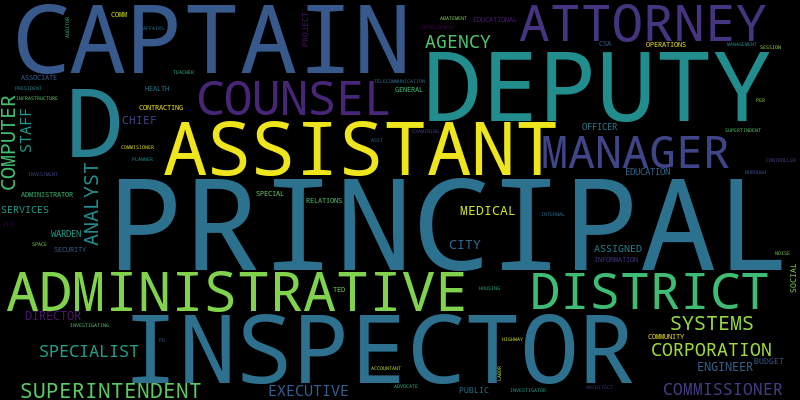

Quantile 999: 185886 - 191371, 552 salaries


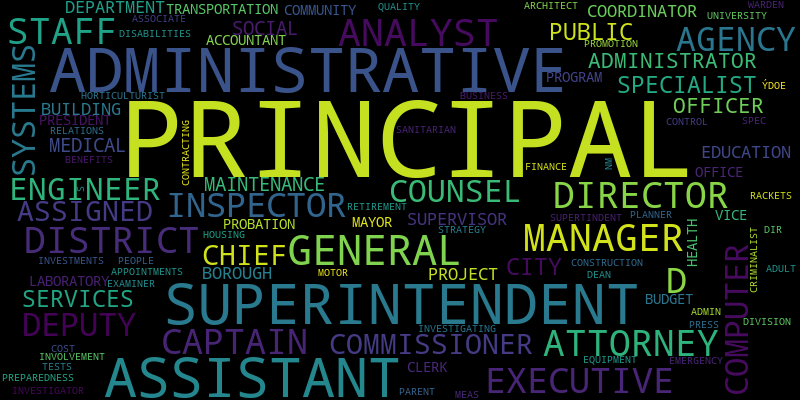

Quantile 1000: 191371 - 409058, 1490 salaries


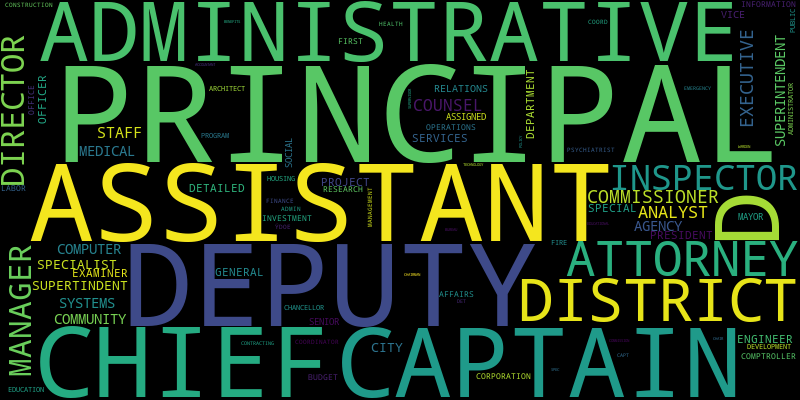

In [139]:
make_wordclouds(title_salary, 1000, 990)